## Deep Learning Series 7: Text Document Classification Using 20 Newsgroups Dataset

This data set is a collection of 18,846 messages, collected from 20 different netnews newsgroups.
You can get the data from [here](http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html).

First of all, we load the data use the function from sklearn package, then use several methods to get the features, then use kinds of traditional machine learning models to fit the data.

Secondly, we use deep learning algorithm in keras to train the model, because of the limited computer resources, I can not run the whole process.

Below code is come from:

http://blog.csdn.net/abcjennifer/article/details/23615947/

http://keras-cn.readthedocs.io/en/latest/blog/word_embedding/

http://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

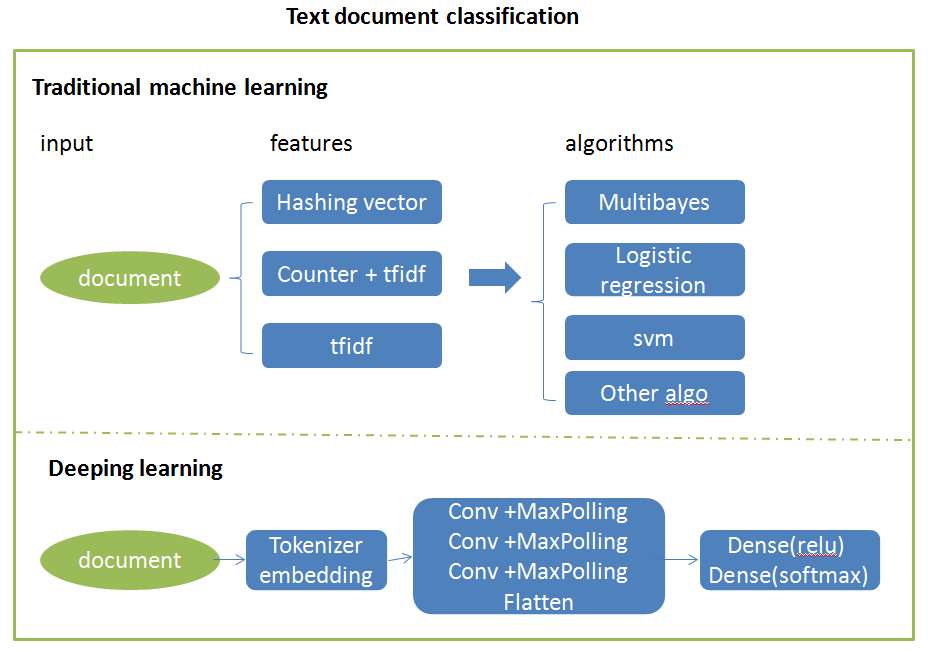

In [1]:
from IPython.display import Image
Image('20news.png')

#### 1 Load Dataset

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
#all categories  
newsgroup_train = fetch_20newsgroups(subset='train')  
newsgroup_test = fetch_20newsgroups(subset='test') 
#part categories  
#categories = ['comp.graphics',  
# 'comp.os.ms-windows.misc',  
# 'comp.sys.ibm.pc.hardware',  
# 'comp.sys.mac.hardware',  
# 'comp.windows.x'];  
#newsgroup_train = fetch_20newsgroups(subset = 'train',categories = categories);  
#newsgroup_test = fetch_20newsgroups(subset = 'test',categories = categories);  

In [3]:
len(newsgroup_train.target_names)

20

In [4]:
len(newsgroup_train.data)

11314

In [5]:
len(newsgroup_test.data)

7532

In [6]:
newsgroup_train.data[0]

u"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

#### 2 Get Features

#### 2.1 HashingVectorizer

In [7]:
from sklearn.feature_extraction.text import HashingVectorizer  

vectorizer = HashingVectorizer(stop_words = 'english',non_negative = True,  
                               n_features = 10000)  
fea_train = vectorizer.fit_transform(newsgroup_train.data)  
fea_test = vectorizer.fit_transform(newsgroup_test.data);  

#return feature vector 'fea_train' [n_samples,n_features]  
print 'Size of fea_train:' + repr(fea_train.shape)  
print 'Size of fea_train:' + repr(fea_test.shape)  
#11314 documents, 130107 vectors for all categories  
print 'The average feature sparsity is {0:.3f}%'.format(  
fea_train.nnz/float(fea_train.shape[0]*fea_train.shape[1])*100);  

Size of fea_train:(11314, 10000)
Size of fea_train:(7532, 10000)
The average feature sparsity is 1.128%


#### 2.2 CountVectorizer + TfidfTransformer

Two CountVectorizer in train and test will have different feature dimentions, which will cause some trouble in below steps, so we could solve this problem by let two CountVectorizer in train and test share the same vocabulary.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer  

In [9]:
count_v1= CountVectorizer(stop_words = 'english', max_df = 0.5);  
counts_train = count_v1.fit_transform(newsgroup_train.data);  
print "the shape of train is "+repr(counts_train.shape)  
  
count_v2 = CountVectorizer(stop_words = 'english', max_df = 0.5);  
counts_test = count_v2.fit_transform(newsgroup_test.data);  
print "the shape of test is "+repr(counts_test.shape)  

the shape of train is (11314, 129792)
the shape of test is (7532, 93251)


In [10]:
#method 1:CountVectorizer+TfidfTransformer  
print '*************************\nCountVectorizer+TfidfTransformer\n*************************'  

count_v1= CountVectorizer(stop_words = 'english', max_df = 0.5);  
counts_train = count_v1.fit_transform(newsgroup_train.data);  
print "the shape of train is "+repr(counts_train.shape)  
  
count_v2 = CountVectorizer(vocabulary=count_v1.vocabulary_);  
counts_test = count_v2.fit_transform(newsgroup_test.data);  
print "the shape of test is "+repr(counts_test.shape)  
  
tfidftransformer = TfidfTransformer();  
  
tfidf_train = tfidftransformer.fit(counts_train).transform(counts_train);  
tfidf_test = tfidftransformer.fit(counts_test).transform(counts_test);  

*************************
CountVectorizer+TfidfTransformer
*************************
the shape of train is (11314, 129792)
the shape of test is (7532, 129792)


#### 2.3 TfidfVectorizer

Let two TfidfVectorizer in train and test share the same vocabulary.

In [11]:
#method 2:TfidfVectorizer  
print '*************************\nTfidfVectorizer\n*************************'  

from sklearn.feature_extraction.text import TfidfVectorizer  

tv = TfidfVectorizer(sublinear_tf = True,  
                                    max_df = 0.5,  
                                    stop_words = 'english');  
tfidf_train_2 = tv.fit_transform(newsgroup_train.data); 

tv2 = TfidfVectorizer(vocabulary = tv.vocabulary_);  
tfidf_test_2 = tv2.fit_transform(newsgroup_test.data);  

print "the shape of train is "+repr(tfidf_train_2.shape)  
print "the shape of test is "+repr(tfidf_test_2.shape)  
#analyze = tv.build_analyzer()  
#tv.get_feature_names()#statistical features/terms  

*************************
TfidfVectorizer
*************************
the shape of train is (11314, 129792)
the shape of test is (7532, 129792)


#### 3 Traditional Classification Models

#### 3.1 Multinomial Naive Bayes Classifier

In [13]:
def calculate_result(actual,pred):  
    m_precision = metrics.precision_score(actual,pred);  
    m_recall = metrics.recall_score(actual,pred);  
    print 'predict info:'  
    print 'precision:{0:.3f}'.format(m_precision)  
    print 'recall:{0:0.3f}'.format(m_recall);  
    print 'f1-score:{0:.3f}'.format(metrics.f1_score(actual,pred));  

In [16]:
#Multinomial Naive Bayes Classifier  
print '*************************\nNaive Bayes\n*************************'  

from sklearn.naive_bayes import MultinomialNB   
from sklearn import metrics  

#create the Multinomial Naive Bayesian Classifier  
clf = MultinomialNB(alpha = 0.01)   

print '********** HashingVectorizer ***************'
clf.fit(fea_train, newsgroup_train.target);  
pred = clf.predict(fea_test);  
calculate_result(newsgroup_test.target, pred);  
#notice here we can see that f1_score is not equal to 2*precision*recall/(precision+recall)  
#because the m_precision and m_recall we get is averaged, however, metrics.f1_score() calculates  
#not average, i.e., takes into the number of each class into consideration.  

print '********** CountVectorizer + TfidfTransformer ***************'
clf.fit(tfidf_train, newsgroup_train.target);  
pred = clf.predict(tfidf_test);  
calculate_result(newsgroup_test.target, pred);  

print '********** TfidfVectorizer ***************'
clf.fit(tfidf_train_2, newsgroup_train.target);  
pred = clf.predict(tfidf_test_2 );  
calculate_result(newsgroup_test.target, pred);  

*************************
Naive Bayes
*************************
********** HashingVectorizer ***************
predict info:
precision:0.801
recall:0.798
f1-score:0.796
********** CountVectorizer + TfidfTransformer ***************
predict info:
precision:0.833
recall:0.832
f1-score:0.831
********** TfidfVectorizer ***************
predict info:
precision:0.834
recall:0.833
f1-score:0.831
********** fetch_20newsgroups_vectorized ***************
predict info:
precision:0.047
recall:0.045
f1-score:0.043


#### 3.2 K Nearest Neighbors (KNN)

In [17]:
#KNN Classifier  
from sklearn.neighbors import KNeighborsClassifier  

print '*************************\nKNN\n*************************'  
knnclf = KNeighborsClassifier()#default with k=5  

print '********** HashingVectorizer ***************'
knnclf.fit(fea_train,newsgroup_train.target)  
pred = knnclf.predict(fea_test);  
calculate_result(newsgroup_test.target,pred);  

print '********** CountVectorizer + TfidfTransformer ***************'
knnclf.fit(tfidf_train, newsgroup_train.target);  
pred = knnclf.predict(tfidf_test);  
calculate_result(newsgroup_test.target, pred);  

print '********** TfidfVectorizer ***************'
knnclf.fit(tfidf_train_2, newsgroup_train.target);  
pred = knnclf.predict(tfidf_test_2 );  
calculate_result(newsgroup_test.target, pred);  

*************************
KNN
*************************
********** HashingVectorizer ***************
predict info:
precision:0.629
recall:0.616
f1-score:0.617
********** CountVectorizer + TfidfTransformer ***************
predict info:
precision:0.687
recall:0.678
f1-score:0.679
********** TfidfVectorizer ***************
predict info:
precision:0.697
recall:0.687
f1-score:0.689
********** fetch_20newsgroups_vectorized ***************
predict info:
precision:0.046
recall:0.047
f1-score:0.040


#### 3.3 Support Vector Machine (SVM) 

In [18]:
#SVM Classifier  
from sklearn.svm import SVC  

print '*************************\nSVM\n*************************'  
svclf = SVC(kernel = 'linear')#default with 'rbf'  

print '********** HashingVectorizer ***************'
svclf.fit(fea_train,newsgroup_train.target)  
pred = svclf.predict(fea_test);  
calculate_result(newsgroup_test.target,pred); 

print '********** CountVectorizer + TfidfTransformer ***************'
svclf.fit(tfidf_train, newsgroup_train.target);  
pred = svclf.predict(tfidf_test);  
calculate_result(newsgroup_test.target, pred);  

print '********** TfidfVectorizer ***************'
svclf.fit(tfidf_train_2, newsgroup_train.target);  
pred = svclf.predict(tfidf_test_2 );  
calculate_result(newsgroup_test.target, pred);   

*************************
SVM
*************************
********** HashingVectorizer ***************
predict info:
precision:0.790
recall:0.785
f1-score:0.784
********** CountVectorizer + TfidfTransformer ***************
predict info:
precision:0.840
recall:0.835
f1-score:0.835
********** TfidfVectorizer ***************
predict info:
precision:0.841
recall:0.837
f1-score:0.837
********** fetch_20newsgroups_vectorized ***************
predict info:
precision:0.045
recall:0.049
f1-score:0.044


D:\application\Anaconda_64\lib\site-packages\sklearn\metrics\metrics.py:1771: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\application\Anaconda_64\lib\site-packages\sklearn\metrics\metrics.py:1771: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 3.4 Logistic Regression

In [21]:
#Logistic Regression Classifier  
from sklearn.linear_model import LogisticRegression

print '*************************\nLogistic Regression\n*************************'  
lrclf = LogisticRegression()#default with 'ovr'  

print '********** HashingVectorizer ***************'
lrclf.fit(fea_train,newsgroup_train.target)  
pred = lrclf.predict(fea_test);  
calculate_result(newsgroup_test.target,pred); 

print '********** CountVectorizer + TfidfTransformer ***************'
lrclf.fit(tfidf_train, newsgroup_train.target);  
pred = lrclf.predict(tfidf_test);  
calculate_result(newsgroup_test.target, pred);  

print '********** TfidfVectorizer ***************'
lrclf.fit(tfidf_train_2, newsgroup_train.target);  
pred = lrclf.predict(tfidf_test_2 );  
calculate_result(newsgroup_test.target, pred);   

*************************
Logistic Regression
*************************
********** HashingVectorizer ***************
predict info:
precision:0.774
recall:0.772
f1-score:0.769
********** CountVectorizer + TfidfTransformer ***************
predict info:
precision:0.833
recall:0.830
f1-score:0.828
********** TfidfVectorizer ***************
predict info:
precision:0.835
recall:0.832
f1-score:0.830


#### 4 Deep Learning Models

In [1]:
import os
import sys
import numpy as np

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model

Using Theano backend.


#### 4.1 Load Dataset

In [2]:
BASE_DIR = 'scikit_learn_data'
GLOVE_DIR = BASE_DIR + '/glove.6B/'
TEXT_DATA_DIR = BASE_DIR + '/20news-bydate/'

MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100

In [3]:
texts_train = []  # list of text samples
labels_index_train = {}  # dictionary mapping label name to numeric id
labels_train = []  # list of label ids
train_data_dir = TEXT_DATA_DIR + '20news-bydate-train/'

for name in sorted(os.listdir(train_data_dir)):
    path = os.path.join(train_data_dir, name)
    if os.path.isdir(path):
        label_id = len(labels_index_train)
        labels_index_train[name] = label_id
        for fname in sorted(os.listdir(path)):
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                f = open(fpath)
                texts_train.append(f.read())
                f.close()
                labels_train.append(label_id)

print('Found %s texts in train.' % len(texts_train))

Found 11314 texts in train.


In [4]:
texts_test = []  # list of text samples
labels_index_test = {}  # dictionary mapping label name to numeric id
labels_test = []  # list of label ids
test_data_dir = TEXT_DATA_DIR + '20news-bydate-test/'

for name in sorted(os.listdir(test_data_dir)):
    path = os.path.join(test_data_dir, name)
    if os.path.isdir(path):
        label_id = len(labels_index_test)
        labels_index_test[name] = label_id
        for fname in sorted(os.listdir(path)):
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                f = open(fpath)
                texts_test.append(f.read())
                f.close()
                labels_test.append(label_id)

print('Found %s texts in test.' % len(texts_test))

Found 7532 texts in test.


In [5]:
texts = texts_train + texts_test

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

x_train = data[:len(texts_train)]
x_test = data[len(texts_train):]
labels_train = to_categorical(np.asarray(labels_train))
labels_test = to_categorical(np.asarray(labels_test))

print('Shape of x_train tensor:', x_train.shape)
print('Shape of labels_train tensor:', labels_train.shape)
print('Shape of x_test tensor:', x_test.shape)
print('Shape of labels_test tensor:', labels_test.shape)

Found 179198 unique tokens.
('Shape of x_train tensor:', (11314L, 1000L))
('Shape of labels_train tensor:', (11314L, 20L))
('Shape of x_test tensor:', (7532L, 1000L))
('Shape of labels_test tensor:', (7532L, 20L))


#### 4.2 Initializing our Embedding layer from scratch and learning its weights during training

In [8]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH)

In [13]:
# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(35)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index_train), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(x_train, labels_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, labels_test))

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named mkl


Train on 11314 samples, validate on 7532 samples
Epoch 1/10
11264/11314 [============================>.] - ETA: 15s - loss: 2.7359 - acc: 0.1090Traceback (most recent call last):
  File "D:\application\Anaconda_64\lib\site-packages\IPython\core\ultratb.py", line 970, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "D:\application\Anaconda_64\lib\site-packages\IPython\core\ultratb.py", line 233, in wrapped
    return f(*args, **kwargs)
  File "D:\application\Anaconda_64\lib\site-packages\IPython\core\ultratb.py", line 267, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "D:\application\Anaconda_64\lib\inspect.py", line 1044, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "D:\application\Anaconda_64\lib\inspect.py", line 1004, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "D:\application\Anaconda_64\li

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt



Unfortunately, your original traceback can not be constructed.



TypeError: 'NoneType' object is not iterable

#### 4.3 GloVe word embeddings

- GloVe stands for "Global Vectors for Word Representation". 
- It's a somewhat popular embedding technique based on factorizing a matrix of word co-occurence statistics.

In [6]:
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [7]:
# prepare embedding matrix
num_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer_glove = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer_glove(sequence_input)

x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(35)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index_train), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(x_train, labels_train,
          batch_size=128,
          epochs=2,
          validation_data=(x_test, labels_test))

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named mkl


Train on 11314 samples, validate on 7532 samples
Epoch 1/2
  384/11314 [>.............................] - ETA: 2078s - loss: 2.9939 - acc: 0.0651